In [1]:
# !pip install scikit-learn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

# Windows용 한글 폰트 설정 (맑은 고딕)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 한글폰트 예시

plt.rcParams['axes.unicode_minus'] = True  # 음수 기호 제대로 표시 설정

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 데이터 불러오기
df = pd.read_csv('train_subway23.csv')  # 파일 경로에 맞게 수정

# 데이터 상위 5개 행 확인
df.head(10)

,Unnamed: 0,train_subway23.tm,train_subway23.line,train_subway23.station_number,train_subway23.station_name,train_subway23.direction,train_subway23.stn,train_subway23.ta,train_subway23.wd,train_subway23.ws,train_subway23.rn_day,train_subway23.rn_hr1,train_subway23.hm,train_subway23.si,train_subway23.ta_chi,train_subway23.congestion
0,1,2023010100,1,150,서울역,상선,419,0.3,318.0,3.4,0.0,0.0,66.5,-99.00,0.7,0
1,2,2023010101,1,150,서울역,상선,419,0.6,293.8,3.4,0.0,0.0,67.5,-99.00,-0.6,0
2,3,2023010105,1,150,서울역,상선,419,-0.8,29.6,3.7,0.0,0.0,55.1,-99.00,-2.2,3
3,4,2023010106,1,150,서울역,상선,419,-1.8,48.1,3.4,0.0,0.0,62.8,-99.00,-4.0,6
4,5,2023010107,1,150,서울역,상선,419,-2.6,21.4,2.9,0.0,0.0,68.8,-99.00,-2.8,5
5,6,2023010108,1,150,서울역,상선,419,-3.0,353.4,2.8,0.0,0.0,70.4,0.00,-5.9,8
6,7,2023010109,1,150,서울역,상선,419,-3.1,348.6,3.2,0.0,0.0,71.7,0.28,-4.7,13
7,8,2023010110,1,150,서울역,상선,419,-2.2,3.8,2.6,0.0,0.0,61.8,0.83,-0.5,19
8,9,2023010111,1,150,서울역,상선,419,-1.2,353.8,2.6,0.0,0.0,56.2,1.38,-1.4,23
9,10,2023010112,1,150,서울역,상선,419,0.3,310.5,2.4,0.0,0.0,52.0,1.73,-0.2,24


In [3]:
df.replace(-99, np.nan, inplace=True)
df['train_subway23.wd'] = df['train_subway23.wd'].replace(-9.9, np.nan) # 풍향의 -9.9 결측값도 NaN 처리
df.isnull().sum()

Unnamed: 0                             0
train_subway23.tm                      0
train_subway23.line                    0
train_subway23.station_number          0
train_subway23.station_name            0
train_subway23.direction               0
train_subway23.stn                     0
train_subway23.ta                 105748
train_subway23.wd                 152942
train_subway23.ws                 108468
train_subway23.rn_day             146132
train_subway23.rn_hr1             148548
train_subway23.hm                 106130
train_subway23.si                2076507
train_subway23.ta_chi                 36
train_subway23.congestion              0
dtype: int64

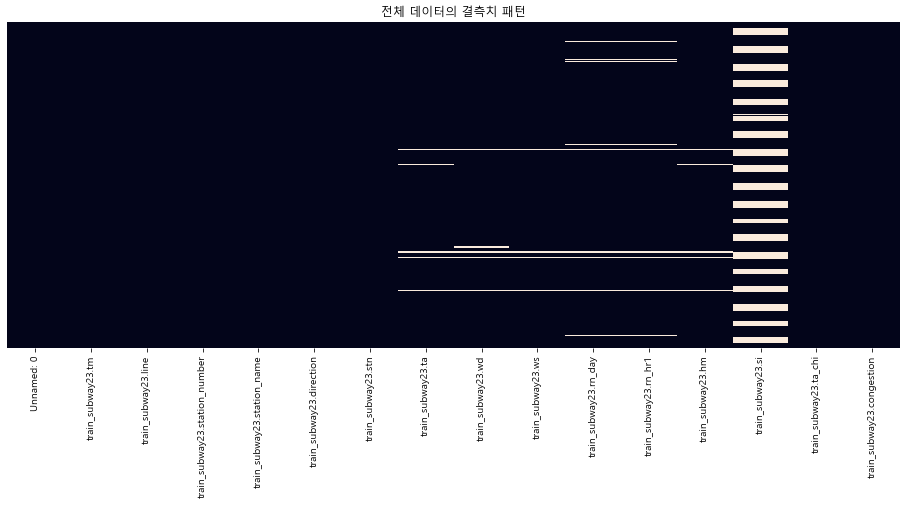

In [8]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('전체 데이터의 결측치 패턴')
plt.show()

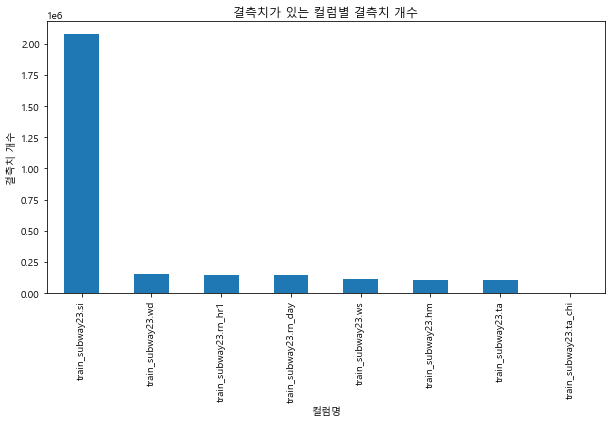

In [4]:
# 컬럼별 결측치 개수
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)  # 결측치 1개 이상만

plt.figure(figsize=(10, 5))
missing.plot(kind='bar')
plt.title('결측치가 있는 컬럼별 결측치 개수')
plt.ylabel('결측치 개수')
plt.xlabel('컬럼명')
plt.show()


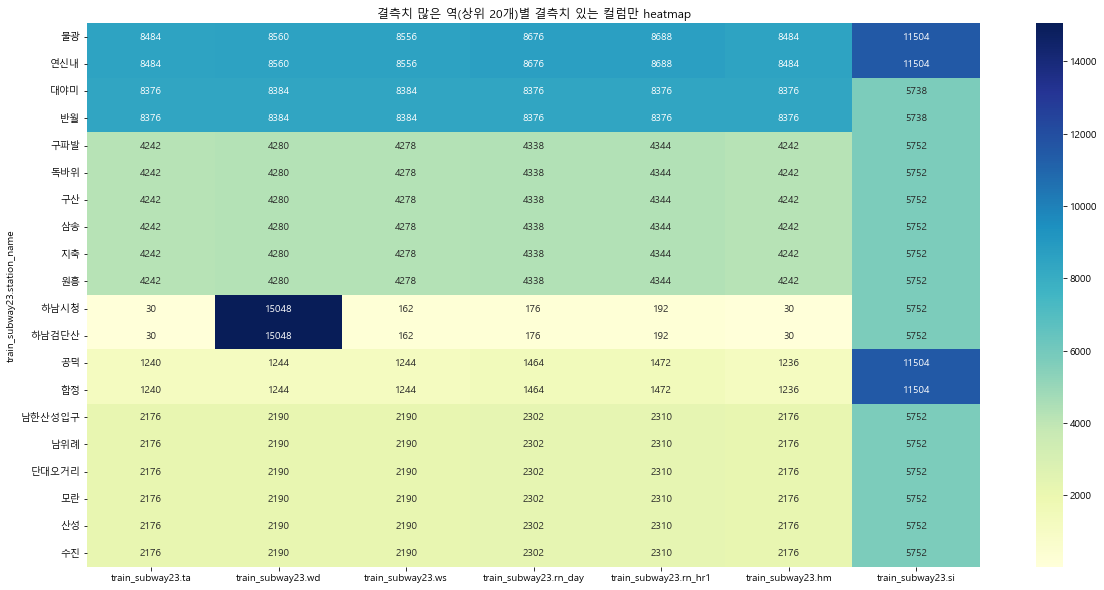

In [5]:
# 1. 상위 20개 역의 결측치 DataFrame
missing_by_station_col = df.groupby('train_subway23.station_name').apply(lambda x: x.isnull().sum())
top_stations = missing_by_station_col.sum(axis=1).sort_values(ascending=False).head(20).index
top20_missing_df = missing_by_station_col.loc[top_stations]

# 2. 결측치가 1개라도 있는 컬럼만 추출
cols_with_missing = top20_missing_df.sum(axis=0) > 0
top20_missing_df = top20_missing_df.loc[:, cols_with_missing]

# 3. 시각화
plt.figure(figsize=(20, 10))
sns.heatmap(top20_missing_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title('결측치 많은 역(상위 20개)별 결측치 있는 컬럼만 heatmap')
plt.show()

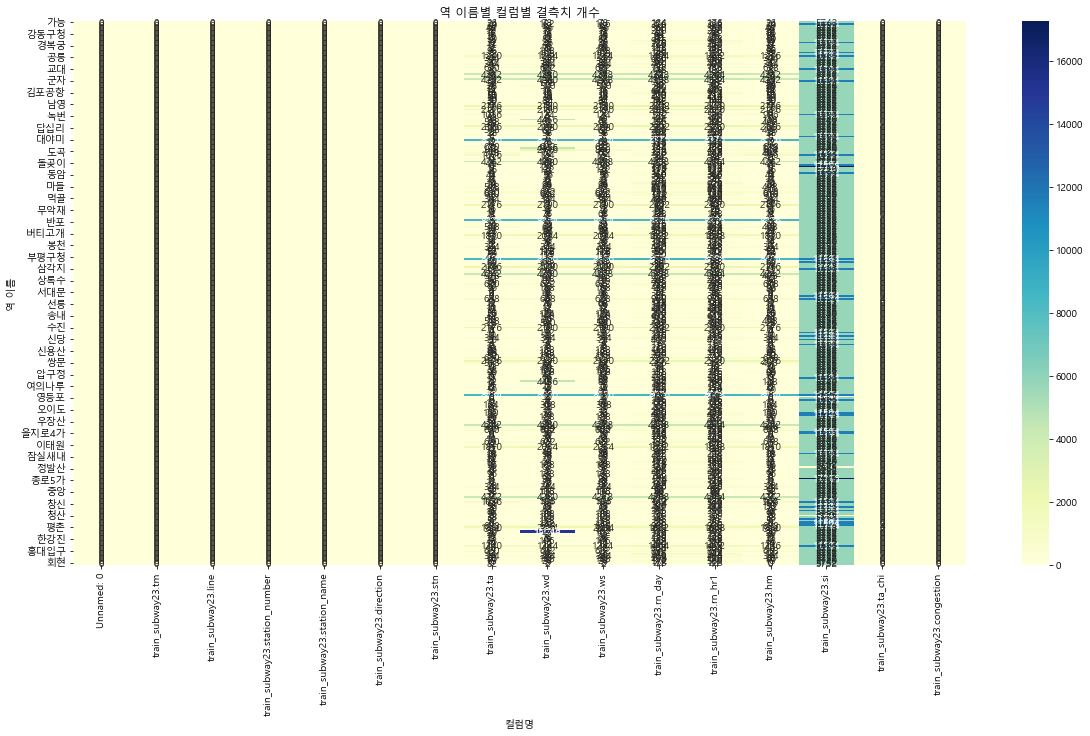

In [21]:
plt.figure(figsize=(20, 10))  # (가로, 세로) inch 단위
sns.heatmap(missing_by_station_col, annot=True, fmt="d", cmap="YlGnBu")
plt.title('역 이름별 컬럼별 결측치 개수')
plt.ylabel('역 이름')
plt.xlabel('컬럼명')
plt.show()

In [4]:
# datetime + weekday
df['datetime'] = pd.to_datetime(df['train_subway23.tm'].astype(str), format='%Y%m%d%H')
df = df.set_index('datetime') # df = df.reset_index()으로 초기화

df['train_subway23.datetime'] = pd.to_datetime(df['train_subway23.tm'], format='%Y%m%d%H')
df['weekday'] = df['train_subway23.datetime'].dt.weekday
df['train_subway23.is_weekday'] = df['weekday'].apply(lambda x: 1 if x < 5 else 0)

In [5]:
# train_subway23.rush_hour 생성
# 1. 정수형을 문자열로 변환
df['train_subway23.tm'] = df['train_subway23.tm'].astype(str)

# 2. 문자열에서 연, 월, 일, 시 분리
df['year'] = df['train_subway23.tm'].str[:4].astype('int64')
df['month'] = df['train_subway23.tm'].str[4:6].astype('int64')
df['day'] = df['train_subway23.tm'].str[6:8].astype('int64')
df['hour'] = df['train_subway23.tm'].str[8:10].astype('int64')

# 출퇴근 시간: 07, 08, 09, 17, 18, 19 → 1 / 나머지 → 0
df['train_subway23.rush_hour'] = df['hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)

In [6]:
from sklearn.preprocessing import LabelEncoder
# 역이름 label encoding
le = LabelEncoder()
df['train_subway23.station_name_encoded'] = le.fit_transform(df['train_subway23.station_name'])

In [7]:
# 방법 1: map 활용 (가장 간단)
direction_map = {'내선': 0, '상선': 0, '외선': 1, '하선': 1}
df['train_subway23.direction_bin'] = df['train_subway23.direction'].map(direction_map)

In [8]:
# 조건에 해당하는 컬럼만 필터링
cols_with_minus_99 = df.columns[(df == -99).any()]
print("다음 컬럼에 -99가 포함되어 있음:")
print(cols_with_minus_99.tolist())

다음 컬럼에 -99가 포함되어 있음:
['train_subway23.ta', 'train_subway23.wd', 'train_subway23.ws', 'train_subway23.rn_day', 'train_subway23.rn_hr1', 'train_subway23.hm', 'train_subway23.si', 'train_subway23.ta_chi']


In [9]:
df.replace(-99, np.nan, inplace=True)
df['train_subway23.wd'] = df['train_subway23.wd'].replace(-9.9, np.nan) # 풍향의 -9.9 결측값도 NaN 처리
df.isnull().sum()


Unnamed: 0                                   0
train_subway23.tm                            0
train_subway23.line                          0
train_subway23.station_number                0
train_subway23.station_name                  0
train_subway23.direction                     0
train_subway23.stn                           0
train_subway23.ta                       105748
train_subway23.wd                       152942
train_subway23.ws                       108468
train_subway23.rn_day                   146132
train_subway23.rn_hr1                   148548
train_subway23.hm                       106130
train_subway23.si                      2076507
train_subway23.ta_chi                       36
train_subway23.congestion                    0
train_subway23.datetime                      0
weekday                                      0
train_subway23.is_weekday                    0
year                                         0
month                                        0
day          

In [10]:
# datetime 인덱스에서 '시(hour)' 추출
target_hours = [21, 22, 23, 0, 1, 5]

# 4~8월은 주간 06~20시
df.loc[df.index.hour.isin(target_hours), 'train_subway23.si'] = 0

month = df.index.month
hour = df.index.hour

# 3, 9, 10월은 주간 07~19시
cond1 = (month.isin([3, 9, 10])) & (hour.isin([6, 20]))
df.loc[cond1, 'train_subway23.si'] = 0

# 1, 2, 11, 12월은 주간 08~18시
cond2 = (month.isin([1, 2, 11, 12])) & (hour.isin([6, 7, 19, 20]))
df.loc[cond2, 'train_subway23.si'] = 0

df.head(40)

,Unnamed: 0,train_subway23.tm,train_subway23.line,train_subway23.station_number,train_subway23.station_name,train_subway23.direction,train_subway23.stn,train_subway23.ta,train_subway23.wd,train_subway23.ws,...,train_subway23.datetime,weekday,train_subway23.is_weekday,year,month,day,hour,train_subway23.rush_hour,train_subway23.station_name_encoded,train_subway23.direction_bin
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,2023010100,1,150,서울역,상선,419,0.3,318.0,3.4,...,2023-01-01 00:00:00,6,0,2023,1,1,0,0,163,0
2023-01-01 01:00:00,2,2023010101,1,150,서울역,상선,419,0.6,293.8,3.4,...,2023-01-01 01:00:00,6,0,2023,1,1,1,0,163,0
2023-01-01 05:00:00,3,2023010105,1,150,서울역,상선,419,-0.8,29.6,3.7,...,2023-01-01 05:00:00,6,0,2023,1,1,5,0,163,0
2023-01-01 06:00:00,4,2023010106,1,150,서울역,상선,419,-1.8,48.1,3.4,...,2023-01-01 06:00:00,6,0,2023,1,1,6,0,163,0
2023-01-01 07:00:00,5,2023010107,1,150,서울역,상선,419,-2.6,21.4,2.9,...,2023-01-01 07:00:00,6,0,2023,1,1,7,1,163,0
2023-01-01 08:00:00,6,2023010108,1,150,서울역,상선,419,-3.0,353.4,2.8,...,2023-01-01 08:00:00,6,0,2023,1,1,8,1,163,0
2023-01-01 09:00:00,7,2023010109,1,150,서울역,상선,419,-3.1,348.6,3.2,...,2023-01-01 09:00:00,6,0,2023,1,1,9,1,163,0
2023-01-01 10:00:00,8,2023010110,1,150,서울역,상선,419,-2.2,3.8,2.6,...,2023-01-01 10:00:00,6,0,2023,1,1,10,0,163,0
2023-01-01 11:00:00,9,2023010111,1,150,서울역,상선,419,-1.2,353.8,2.6,...,2023-01-01 11:00:00,6,0,2023,1,1,11,0,163,0


In [11]:
df.isnull().sum()

Unnamed: 0                                  0
train_subway23.tm                           0
train_subway23.line                         0
train_subway23.station_number               0
train_subway23.station_name                 0
train_subway23.direction                    0
train_subway23.stn                          0
train_subway23.ta                      105748
train_subway23.wd                      152942
train_subway23.ws                      108468
train_subway23.rn_day                  146132
train_subway23.rn_hr1                  148548
train_subway23.hm                      106130
train_subway23.si                       41064
train_subway23.ta_chi                      36
train_subway23.congestion                   0
train_subway23.datetime                     0
weekday                                     0
train_subway23.is_weekday                   0
year                                        0
month                                       0
day                               

In [12]:
# 일조량: 10 시간 동안의 이동평균으로 보간
df['train_subway23.si'] = df['train_subway23.si'].fillna(
    df['train_subway23.si'].rolling(window=10, center=True, min_periods=1).mean()
)

In [13]:
# 온도: 6시간 동안의 이동평균으로 보간
df['train_subway23.ta'] = df['train_subway23.ta'].fillna(
    df['train_subway23.ta'].rolling(window=6, center=True, min_periods=1).mean()
)

In [14]:
# 체감온도: 6시간 동안의 이동평균으로 보간
df['train_subway23.ta_chi'] = df['train_subway23.ta_chi'].fillna(
    df['train_subway23.ta_chi'].rolling(window=6, center=True, min_periods=1).mean()
)

In [15]:
# 일 강수량: 24시간 동안의 이동평균으로 보간
df['train_subway23.rn_day'] = df['train_subway23.rn_day'].fillna(
    df['train_subway23.rn_day'].rolling(window=24, center=True, min_periods=1).mean()
)

In [16]:
# 1h 강수량: 3시간 동안의 이동평균으로 보간
df['train_subway23.rn_hr1'] = df['train_subway23.rn_hr1'].fillna(
    df['train_subway23.rn_hr1'].rolling(window=3, center=True, min_periods=1).mean()
)

In [17]:
# 풍향: 6시간 동안의 이동평균으로 보간
# 그 전에 각도 -> 라디안 -> 벡터 변환

# 풍향을 라디안으로 변환
radians = np.deg2rad(df['train_subway23.wd'])

# 각도 → 벡터 분해
df['sin'] = np.sin(radians)
df['cos'] = np.cos(radians)

# 이동 평균
df['sin_avg'] = df['sin'].rolling(window=6, min_periods=1, center=True).mean()
df['cos_avg'] = df['cos'].rolling(window=6, min_periods=1, center=True).mean()

# 벡터 평균 → 다시 각도로 환산
df['train_subway23.wd'] = (np.arctan2(df['sin_avg'], df['cos_avg']) * 180 / np.pi) % 360

df=df.drop(columns=['sin','cos','sin_avg','cos_avg'])
df.head()

,Unnamed: 0,train_subway23.tm,train_subway23.line,train_subway23.station_number,train_subway23.station_name,train_subway23.direction,train_subway23.stn,train_subway23.ta,train_subway23.wd,train_subway23.ws,...,train_subway23.datetime,weekday,train_subway23.is_weekday,year,month,day,hour,train_subway23.rush_hour,train_subway23.station_name_encoded,train_subway23.direction_bin
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,2023010100,1,150,서울역,상선,419,0.3,331.599973,3.4,...,2023-01-01 00:00:00,6,0,2023,1,1,0,0,163,0
2023-01-01 01:00:00,2,2023010101,1,150,서울역,상선,419,0.6,352.657867,3.4,...,2023-01-01 01:00:00,6,0,2023,1,1,1,0,163,0
2023-01-01 05:00:00,3,2023010105,1,150,서울역,상선,419,-0.8,0.301763,3.7,...,2023-01-01 05:00:00,6,0,2023,1,1,5,0,163,0
2023-01-01 06:00:00,4,2023010106,1,150,서울역,상선,419,-1.8,358.807903,3.4,...,2023-01-01 06:00:00,6,0,2023,1,1,6,0,163,0
2023-01-01 07:00:00,5,2023010107,1,150,서울역,상선,419,-2.6,4.432084,2.9,...,2023-01-01 07:00:00,6,0,2023,1,1,7,1,163,0


In [18]:
# 풍속: 6시간 동안의 이동평균으로 보간
df['train_subway23.ws'] = df['train_subway23.ws'].fillna(
    df['train_subway23.ws'].rolling(window=6, center=True, min_periods=1).mean()
)

In [19]:
# 습도: 6시간 동안의 이동평균으로 보간
df['train_subway23.hm'] = df['train_subway23.hm'].fillna(
    df['train_subway23.hm'].rolling(window=6, center=True, min_periods=1).mean()
)

In [20]:
df.isnull().sum()

Unnamed: 0                                  0
train_subway23.tm                           0
train_subway23.line                         0
train_subway23.station_number               0
train_subway23.station_name                 0
train_subway23.direction                    0
train_subway23.stn                          0
train_subway23.ta                      100118
train_subway23.wd                      139199
train_subway23.ws                       95400
train_subway23.rn_day                   91084
train_subway23.rn_hr1                  137934
train_subway23.hm                      100302
train_subway23.si                        1220
train_subway23.ta_chi                       0
train_subway23.congestion                   0
train_subway23.datetime                     0
weekday                                     0
train_subway23.is_weekday                   0
year                                        0
month                                       0
day                               

In [21]:
# 월별 이동평균
df['month'] = df.index.to_period('M')
monthly_mean = df.groupby('month')['train_subway23.ta'].transform('mean')
df['monthly_mean'] = monthly_mean
# 기온
df['train_subway23.ta'] = df['train_subway23.ta'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                  0
train_subway23.tm                           0
train_subway23.line                         0
train_subway23.station_number               0
train_subway23.station_name                 0
train_subway23.direction                    0
train_subway23.stn                          0
train_subway23.ta                           0
train_subway23.wd                      139199
train_subway23.ws                       95400
train_subway23.rn_day                   91084
train_subway23.rn_hr1                  137934
train_subway23.hm                      100302
train_subway23.si                        1220
train_subway23.ta_chi                       0
train_subway23.congestion                   0
train_subway23.datetime                     0
weekday                                     0
train_subway23.is_weekday                   0
year                                        0
month                                       0
day                               

In [22]:
# 풍향
monthly_mean = df.groupby('month')['train_subway23.wd'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway23.wd'] = df['train_subway23.wd'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                  0
train_subway23.tm                           0
train_subway23.line                         0
train_subway23.station_number               0
train_subway23.station_name                 0
train_subway23.direction                    0
train_subway23.stn                          0
train_subway23.ta                           0
train_subway23.wd                           0
train_subway23.ws                       95400
train_subway23.rn_day                   91084
train_subway23.rn_hr1                  137934
train_subway23.hm                      100302
train_subway23.si                        1220
train_subway23.ta_chi                       0
train_subway23.congestion                   0
train_subway23.datetime                     0
weekday                                     0
train_subway23.is_weekday                   0
year                                        0
month                                       0
day                               

In [23]:
# 풍속
monthly_mean = df.groupby('month')['train_subway23.ws'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway23.ws'] = df['train_subway23.ws'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                  0
train_subway23.tm                           0
train_subway23.line                         0
train_subway23.station_number               0
train_subway23.station_name                 0
train_subway23.direction                    0
train_subway23.stn                          0
train_subway23.ta                           0
train_subway23.wd                           0
train_subway23.ws                           0
train_subway23.rn_day                   91084
train_subway23.rn_hr1                  137934
train_subway23.hm                      100302
train_subway23.si                        1220
train_subway23.ta_chi                       0
train_subway23.congestion                   0
train_subway23.datetime                     0
weekday                                     0
train_subway23.is_weekday                   0
year                                        0
month                                       0
day                               

In [24]:
# 일 강수량
monthly_mean = df.groupby('month')['train_subway23.rn_day'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway23.rn_day'] = df['train_subway23.rn_day'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                  0
train_subway23.tm                           0
train_subway23.line                         0
train_subway23.station_number               0
train_subway23.station_name                 0
train_subway23.direction                    0
train_subway23.stn                          0
train_subway23.ta                           0
train_subway23.wd                           0
train_subway23.ws                           0
train_subway23.rn_day                       0
train_subway23.rn_hr1                  137934
train_subway23.hm                      100302
train_subway23.si                        1220
train_subway23.ta_chi                       0
train_subway23.congestion                   0
train_subway23.datetime                     0
weekday                                     0
train_subway23.is_weekday                   0
year                                        0
month                                       0
day                               

In [25]:
# 1시간 강수량
monthly_mean = df.groupby('month')['train_subway23.rn_hr1'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway23.rn_hr1'] = df['train_subway23.rn_hr1'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                  0
train_subway23.tm                           0
train_subway23.line                         0
train_subway23.station_number               0
train_subway23.station_name                 0
train_subway23.direction                    0
train_subway23.stn                          0
train_subway23.ta                           0
train_subway23.wd                           0
train_subway23.ws                           0
train_subway23.rn_day                       0
train_subway23.rn_hr1                       0
train_subway23.hm                      100302
train_subway23.si                        1220
train_subway23.ta_chi                       0
train_subway23.congestion                   0
train_subway23.datetime                     0
weekday                                     0
train_subway23.is_weekday                   0
year                                        0
month                                       0
day                               

In [26]:
# 습도
monthly_mean = df.groupby('month')['train_subway23.hm'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway23.hm'] = df['train_subway23.hm'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                0
train_subway23.tm                         0
train_subway23.line                       0
train_subway23.station_number             0
train_subway23.station_name               0
train_subway23.direction                  0
train_subway23.stn                        0
train_subway23.ta                         0
train_subway23.wd                         0
train_subway23.ws                         0
train_subway23.rn_day                     0
train_subway23.rn_hr1                     0
train_subway23.hm                         0
train_subway23.si                      1220
train_subway23.ta_chi                     0
train_subway23.congestion                 0
train_subway23.datetime                   0
weekday                                   0
train_subway23.is_weekday                 0
year                                      0
month                                     0
day                                       0
hour                            

In [27]:
# 일조량
monthly_mean = df.groupby('month')['train_subway23.si'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway23.si'] = df['train_subway23.si'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                             0
train_subway23.tm                      0
train_subway23.line                    0
train_subway23.station_number          0
train_subway23.station_name            0
train_subway23.direction               0
train_subway23.stn                     0
train_subway23.ta                      0
train_subway23.wd                      0
train_subway23.ws                      0
train_subway23.rn_day                  0
train_subway23.rn_hr1                  0
train_subway23.hm                      0
train_subway23.si                      0
train_subway23.ta_chi                  0
train_subway23.congestion              0
train_subway23.datetime                0
weekday                                0
train_subway23.is_weekday              0
year                                   0
month                                  0
day                                    0
hour                                   0
train_subway23.rush_hour               0
train_subway23.s

In [28]:
df=df.drop(columns='monthly_mean')

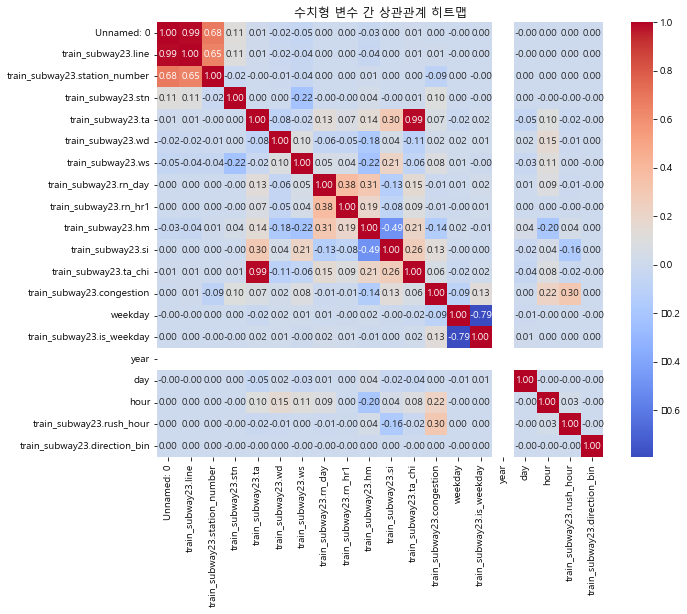

In [29]:
# 수치형 변수 간 상관관계 히트맵
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("수치형 변수 간 상관관계 히트맵")
plt.show()

In [30]:
df.to_csv('train_subway23_mov.csv', index=True, encoding='utf-8')